# Exercise 1

## Imports

In [10]:
from kohonen import SelfOrganizingMap
from utils import load_europe_data
import numpy as np
from matplotlib import pyplot as plt
from oja import OjaNetwork

## Loading the Data

In [2]:
X, countries = load_europe_data("../data/europe.csv")
from sklearn.decomposition import PCA

# X is your (29, d) standardized data
pca = PCA(n_components=2).fit(X)
ratio = np.sqrt(pca.explained_variance_[0] / pca.explained_variance_[1])
print(f"PCA σ1/σ2 ratio ≈ {ratio:.2f}")

PCA σ1/σ2 ratio ≈ 1.65


## Training

### Self Organising Map

#### Configuration

In [3]:
m, n = 6, 5
learning_rate = 0.5
sigma = 1.5
epochs = 100

#### Training

In [4]:
som = SelfOrganizingMap(
    m=m,
    n=n,
    dim=X.shape[1],
    learning_rate=learning_rate,
    sigma=sigma,
    epochs=epochs,
)
print(f"Training SOM on {X.shape[0]} samples…")
som.train(X)
print("Done.")

Training SOM on 28 samples…
Done.


## Visualisation

### SOM Clusters

14 [-0.31489707 -0.29166904]
15 [ 0.27030806 -0.3462437 ]
0 [-0.37628075  0.55297546]
1 [0.45713791 0.00600562]
12 [-0.73807099 -0.04029632]
16 [-0.91275881  0.12438296]
4 [-0.8463586   0.66239609]
22 [-0.60648781  0.8287715 ]
3 [-0.48130339 -0.72342322]
20 [ 0.8194564 -0.9123234]
9 [0.59764284 0.24407273]
27 [-0.7979914  -0.04099134]
7 [ 0.56018263 -0.80274012]
24 [0.32824398 0.40109561]


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


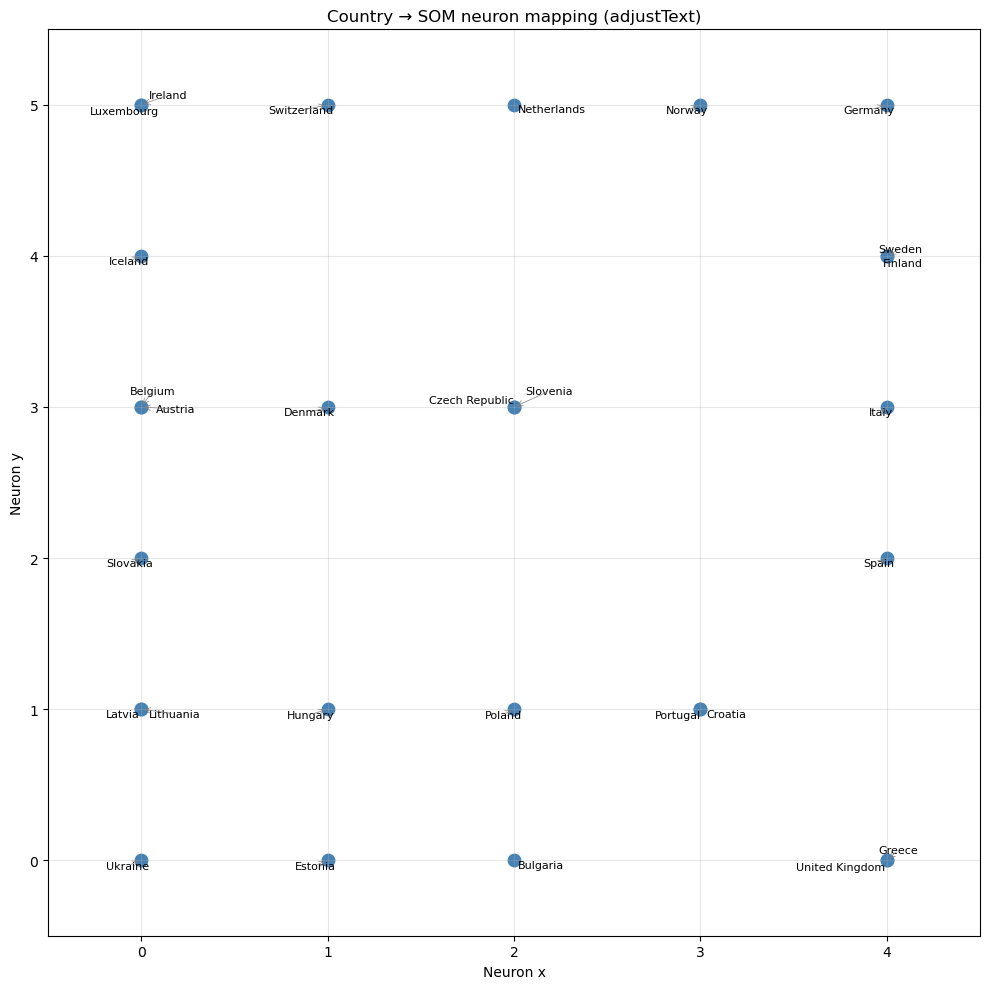

In [ ]:
from adjustText import adjust_text
bmus = som.map_data(X)       # array of length n_samples
coords = np.array([[i,j] for i in range(m) for j in range(n)])
mapped = coords[bmus]
x_coords = mapped[:,1]
y_coords = mapped[:,0]

plt.figure(figsize=(10,10), dpi=100)
plt.scatter(x_coords, y_coords, s=80, marker='o', color='steelblue')

# create text artists
texts = []
for x, y, country in zip(x_coords, y_coords, countries):
    texts.append(
        plt.text(x, y, country, fontsize=8, ha='center', va='center')
    )

# apply automatic adjustment
adjust_text(
    texts,
    only_move={'points':'y', 'texts':'xy'},
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_text=(1.1, 1.2),
    expand_points=(1.2, 1.2)
)

plt.xlim(-0.5, n-0.5)
plt.ylim(m-0.5, -0.5)
plt.gca().invert_yaxis()
plt.xticks(range(n))
plt.yticks(range(m))
plt.grid(alpha=0.3)
plt.title("Country → SOM neuron mapping")
plt.xlabel("Neuron x")
plt.ylabel("Neuron y")
plt.tight_layout()
plt.show()

### U-Matrix

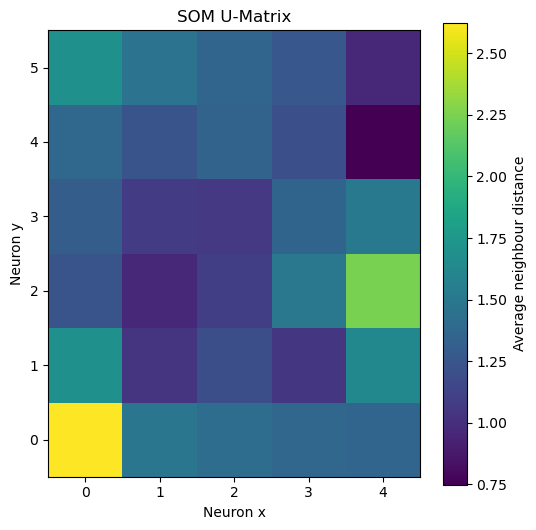

In [8]:
u = som.umatrix()            # shape (m, n)
plt.figure(figsize=(6,6))
plt.imshow(u, cmap="viridis", origin="lower")
plt.colorbar(label="Average neighbour distance")
plt.title("SOM U-Matrix")
plt.xlabel("Neuron x")
plt.ylabel("Neuron y")
plt.show()

## Comparison

### Oja Primary Component

In [16]:
X = np.outer(np.linspace(-5,5,100), np.array([1,2]))
net = OjaNetwork(dim=2, learning_rate=0.01, epochs=100)
net.train(X)
comp = net.get_principal_component()
comp

array([0.4472136 , 0.89442719])

### PCA Primary Component

In [17]:
pca = PCA(n_components=1)
pca_comp = pca.fit(X).components_[0]
pca_comp

array([0.4472136 , 0.89442719])